In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [63]:
df = pd.read_csv("../Module 2/dataset/car_dataset.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [64]:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [65]:
print(df.shape)

(11914, 16)


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [67]:
columns_to_use = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders",
                  "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]

print(len(columns_to_use))

10


In [68]:
filtered_df = df[columns_to_use]
print(filtered_df.shape)
print(filtered_df.info())

(11914, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB
None


In [69]:
filtered_df.columns = filtered_df.columns.str.replace(" ", "_").str.lower()

In [70]:
filtered_df.sample().T 

,2123
make,Volkswagen
model,Cabriolet
year,1992
engine_hp,94.0
engine_cylinders,4.0
transmission_type,MANUAL
vehicle_style,Convertible
highway_mpg,29
city_mpg,22
msrp,2000


In [71]:
filtered_df = filtered_df.fillna(0)

In [72]:
filtered_df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [74]:
filtered_df = filtered_df.rename(columns={"msrp": "price"})

In [75]:
filtered_df.sample().T 

,8211
make,Dodge
model,Ram Van
year,2000
engine_hp,175.0
engine_cylinders,6.0
transmission_type,AUTOMATIC
vehicle_style,Cargo Van
highway_mpg,16
city_mpg,13
price,2348


Question 1 

In [76]:
filtered_df["transmission_type"].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

Question 2

In [77]:
numerical_features = filtered_df.select_dtypes(include=["int64", "float64"]).dtypes.index 
print(numerical_features)

Index(['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')


In [78]:
corr_matrix = filtered_df[numerical_features].corr()
print(corr_matrix)

                      year  engine_hp  engine_cylinders  highway_mpg  \
year              1.000000   0.338714         -0.040708     0.258240   
engine_hp         0.338714   1.000000          0.774851    -0.415707   
engine_cylinders -0.040708   0.774851          1.000000    -0.614541   
highway_mpg       0.258240  -0.415707         -0.614541     1.000000   
city_mpg          0.198171  -0.424918         -0.587306     0.886829   
price             0.227590   0.650095          0.526274    -0.160043   

                  city_mpg     price  
year              0.198171  0.227590  
engine_hp        -0.424918  0.650095  
engine_cylinders -0.587306  0.526274  
highway_mpg       0.886829 -0.160043  
city_mpg          1.000000 -0.157676  
price            -0.157676  1.000000  


In [79]:
test_corr_features = [
    ["engine_hp", "year"],
    ["engine_hp", "engine_cylinders"],
    ["highway_mpg", "engine_cylinders"],
    ["highway_mpg", "city_mpg"]
]

best_corr = -np.inf 
best_id = 0 

for id, feat in enumerate(test_corr_features):
    corr = corr_matrix.loc[feat[0], feat[1]]
    if corr > best_corr:
        best_corr = corr 
        best_id = id 

print(test_corr_features[best_id], best_corr)

['highway_mpg', 'city_mpg'] 0.8868294962591425


Question 3

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

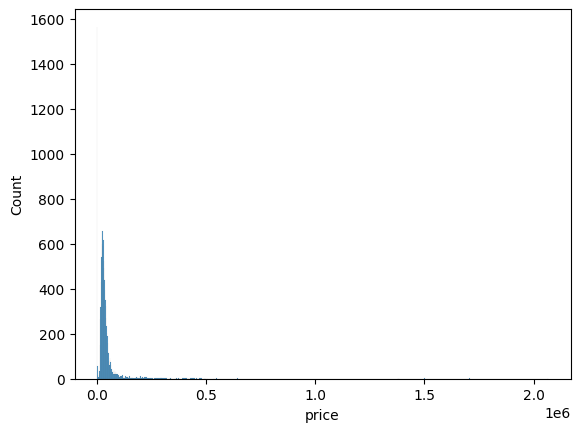

In [17]:
sns.histplot(filtered_df["price"])

In [147]:
filtered_df["price"].mean()

40594.737032063116

In [148]:
filtered_df["above_average"] = filtered_df["price"].apply(lambda x: 1 if x > filtered_df["price"].mean() else 0)

In [149]:
filtered_df["above_average"].value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [150]:
filtered_df_price = filtered_df["price"]
del filtered_df["price"]

In [151]:
from sklearn.model_selection import train_test_split 

In [152]:
filtered_df_full_train, filtered_df_test = train_test_split(filtered_df, test_size=0.2, random_state=42)
filtered_df_train, filtered_df_val = train_test_split(filtered_df_full_train, test_size=0.25, random_state=42)

In [153]:
filtered_df_train = filtered_df_train.reset_index(drop=True)
filtered_df_test = filtered_df_test.reset_index(drop=True)
filtered_df_val = filtered_df_val.reset_index(drop=True)

In [154]:
print(filtered_df_train.shape)
print(filtered_df_test.shape)
print(filtered_df_val.shape)

(7148, 10)
(2383, 10)
(2383, 10)


In [155]:
y_train = filtered_df_train.above_average 
y_test = filtered_df_test.above_average 
y_val = filtered_df_val.above_average 

In [156]:
del filtered_df_train["above_average"]
del filtered_df_test["above_average"]
del filtered_df_val["above_average"]

Question 3 

In [157]:
from sklearn.metrics import mutual_info_score  

In [158]:
def mutual_info_score_train(series):
    return mutual_info_score(series, y_train)

In [159]:
categorical_columns = filtered_df_train.select_dtypes(include=["object"]).dtypes.index 
print(categorical_columns)

Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object')


In [160]:
mutual_info_scores = filtered_df_train[categorical_columns].apply(mutual_info_churn_score)
mutual_info_scores.sort_values(ascending=False)

model                0.462344
make                 0.239769
vehicle_style        0.084143
transmission_type    0.020958
dtype: float64

Question 4

In [195]:
from sklearn.feature_extraction import DictVectorizer

In [196]:
train_dicts = filtered_df_train.to_dict(orient="records")

In [197]:
train_dicts[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [198]:
dv = DictVectorizer(sparse=False)

In [199]:
X_train = dv.fit_transform(train_dicts) 

In [200]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [201]:
X_train.shape 

(7148, 943)

In [202]:
from sklearn.linear_model import LogisticRegression  

In [203]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [204]:
val_dicts = filtered_df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts) 

In [205]:
y_val_pred = model.predict_proba(X_val)[:, 1]
above_average_decision = (y_val_pred >= 0.5)
print((y_val == above_average_decision).mean())
original_val_accuracy_score = (y_val == above_average_decision).mean()

0.9450272765421738


Question 5

In [184]:
# Without year
without_year_cols = list(filtered_df_train.columns)
del without_year_cols[without_year_cols.index("year")]
without_year_cols
train_dicts_without_year = filtered_df_train[without_year_cols].to_dict(orient="records")

In [185]:
X_train_without_year = dv.fit_transform(train_dicts_without_year) 

In [186]:
X_train_without_year.shape 

(7148, 942)

In [187]:
model.fit(X_train_without_year, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [189]:
val_dicts_without_year = filtered_df_val[without_year_cols].to_dict(orient="records")
X_val_without_year = dv.transform(val_dicts_without_year)

In [191]:
y_val_pred_wy = model.predict_proba(X_val_without_year)[:, 1]
above_average_decision_wy = (y_val_pred_wy >= 0.5)
print((y_val == above_average_decision_wy).mean())

0.9479647503147294


In [207]:
features = ["year", "engine_hp", "transmission_type", "city_mpg"]
scores = []

for feature in features:
    without_feat_cols = list(filtered_df_train.columns)

    # Remove the feature from the columns
    del without_feat_cols[without_feat_cols.index(feature)]
    train_dicts_without_feat = filtered_df_train[without_year_cols].to_dict(orient="records")

    X_train_without_feat = dv.fit_transform(train_dicts_without_feat)
    model.fit(X_train_without_feat, y_train)
    
    val_dicts_without_feat = filtered_df_val[without_feat_cols].to_dict(orient="records")
    X_val_without_feat = dv.transform(val_dicts_without_feat)

    y_val_pred_wf = model.predict_proba(X_val_without_feat)[:, 1]
    above_average_decision_wf = (y_val_pred_wf >= 0.5)

    # The accuracy score without the feature
    accuracy_score_wf = (y_val == above_average_decision_wf).mean()
    print(f"Feature: {feature}, Accuracy: {accuracy_score_wf}, Difference: {original_val_accuracy_score-accuracy_score_wf}")

Feature: year, Accuracy: 0.9479647503147294, Difference: -0.002937473772555599
Feature: engine_hp, Accuracy: 0.7247167436005035, Difference: 0.22031053294167025
Feature: transmission_type, Accuracy: 0.8799832144355854, Difference: 0.06504406210658842
Feature: city_mpg, Accuracy: 0.9425094418799832, Difference: 0.0025178346621905767


Question 6

In [209]:
filtered_df_train.columns 

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [210]:
filtered_df["price"] = filtered_df_price 

In [211]:
filtered_df_full_train, filtered_df_test = train_test_split(filtered_df, test_size=0.2, random_state=42)
filtered_df_train, filtered_df_val = train_test_split(filtered_df_full_train, test_size=0.25, random_state=42)

In [212]:
filtered_df_train = filtered_df_train.reset_index(drop=True)
filtered_df_test = filtered_df_test.reset_index(drop=True)
filtered_df_val = filtered_df_val.reset_index(drop=True)

In [213]:
print(filtered_df_train.shape)
print(filtered_df_test.shape)
print(filtered_df_val.shape)

(7148, 11)
(2383, 11)
(2383, 11)


In [214]:
y_train = np.log1p(filtered_df_train.price) 
y_test = np.log1p(filtered_df_test.price)
y_val = np.log1p(filtered_df_val.price)

In [215]:
columns_to_drop = ["price", "above_average"]
filtered_df_train.drop(columns=columns_to_drop, inplace=True)
filtered_df_test.drop(columns=columns_to_drop, inplace=True)
filtered_df_val.drop(columns=columns_to_drop, inplace=True)

In [216]:
print(filtered_df_train.shape)
print(filtered_df_test.shape)
print(filtered_df_val.shape)

(7148, 9)
(2383, 9)
(2383, 9)


In [220]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [221]:
# Iterative over a non-exhaustive list of values
best_score = np.inf
best_alpha = 0 
for alpha in [0, 0.01, 0.1, 1, 10]:
    train_dicts = filtered_df_train.to_dict(orient="records")
    X_train = dv.fit_transform(train_dicts)
    model = Ridge(solver="sag", alpha=alpha)
    model.fit(X_train, y_train)

    val_dicts = filtered_df_val.to_dict(orient="records")
    X_val = dv.transform(val_dicts)
    y_val_pred = model.predict(X_val)

    val_rmse_score = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"For alpha={alpha}: RMSE score = {val_rmse_score}")

    if val_rmse_score < best_score:
        best_score = val_rmse_score 
        best_alpha = alpha

print("------")
print(f"Best alpha = {best_alpha} with score {best_score}")